# Gobike Data Exploration

##  1-Preliminary Wrangling

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
#import the needed libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#read the dataset csv file
gobike=pd.read_csv('201902-fordgobike-tripdata.csv')

# Data Cleaning

In [3]:
#show the first 5 rows of the data
gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
gobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
#show the data types of the columns
gobike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [6]:
#view the number of null values
gobike.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
#show the number of duplicated rows
gobike.duplicated().sum()


0

In [8]:
#drop the rows of null values in the selected columns
gobike=gobike.dropna(subset = ['start_station_id','start_station_name','end_station_id','end_station_name'])

In [9]:
#fill the null values in member birth year column with the mean for each user type
gobike["member_birth_year"] = gobike.groupby("user_type")['member_birth_year'].transform(lambda x: x.fillna(x.mean()))

In [10]:
#fill the null values in member gender column with the mode for each user type
gobike["member_gender"] = gobike.groupby("user_type")["member_gender"].transform(lambda x: x.fillna(x.mode()[0]))

In [11]:
#check if still any null values in data set
gobike.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

## Feature Engineering

In [12]:
#Duration in minutes
gobike['duration_minute']=gobike['duration_sec']/60


In [13]:
#round the results to avoid fractions
gobike['duration_minute']=gobike['duration_minute'].apply(np.round)
gobike['member_birth_year']=gobike['member_birth_year'].apply(np.round)
gobike.duration_minute=gobike.duration_minute.astype(int)
gobike.member_birth_year=gobike.member_birth_year.astype(int)

In [14]:
#Since this data is collected in 2019 so we need to know the age when collecting data not their age now
gobike['Age'] = 2019 - gobike['member_birth_year']
gobike['Age'] = gobike['Age'].astype(int)

In [15]:
#derive a new column that represent the agegroup for each member
gobike.loc[(gobike['Age'] >= 15) & (gobike['Age']<= 24), 'AgeGroup'] = 'Youth'
gobike.loc[(gobike['Age'] >= 25) & (gobike['Age']<= 39), 'AgeGroup'] = 'Young Adult'
gobike.loc[(gobike['Age'] >= 40) & (gobike['Age'] <= 59), 'AgeGroup'] = 'Middle Age Adult'
gobike.loc[(gobike['Age'] >= 60), 'AgeGroup'] = 'Old Adult'

In [16]:
gobike.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'duration_minute', 'Age', 'AgeGroup'],
      dtype='object')

In [17]:
# Changing the format to datetime
gobike['start_time'] = pd.to_datetime(gobike['start_time'])
gobike['end_time'] = pd.to_datetime(gobike['end_time'])

In [18]:
#split date format in columns 
gobike['start_month']=gobike['start_time'].dt.month
gobike['end_month']=gobike['end_time'].dt.month
gobike['start_day']=gobike['start_time'].dt.day
gobike['end_day']=gobike['end_time'].dt.day
gobike['start_hour']=gobike['start_time'].dt.hour
gobike['end_hour']=gobike['end_time'].dt.hour

In [19]:
#Derive a new column that represent the day segment for each ride
gobike.loc[(gobike['start_hour'] >= 6) & (gobike['start_hour']<= 11), 'Day_segment'] = 'Morning'
gobike.loc[(gobike['start_hour'] >= 12) & (gobike['start_hour']<= 17), 'Day_segment'] = 'Afternoon'
gobike.loc[(gobike['start_hour'] >= 18) & (gobike['start_hour']<= 23), 'Day_segment'] = 'Night'
gobike.loc[(gobike['start_hour'] >= 0) & (gobike['start_hour']<= 5), 'Day_segment'] = 'OverNight'



In [20]:
gobike['dayofweek']=gobike['start_time'].dt.dayofweek


In [21]:
gobike.loc[(gobike['dayofweek'] >=0) & (gobike['dayofweek']<= 4), 'Day_Type'] = 'WeekDay'
gobike.loc[(gobike['dayofweek'] >=5) & (gobike['dayofweek']<= 6), 'Day_Type'] = 'Weekend'


In [22]:
gobike['dayofweek']=gobike['dayofweek'].replace({0:"Monday" ,1:"Tuesday",2:"Wednesday",3:"Thursday",
4:"Friday",5:"Saturday",6:"Sunday" })

In [23]:
gobike['dayofweek'].unique()

array(['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday',
       'Friday'], dtype=object)

# Removing Outliers 

Text(0.5, 1.0, 'Age distribution')

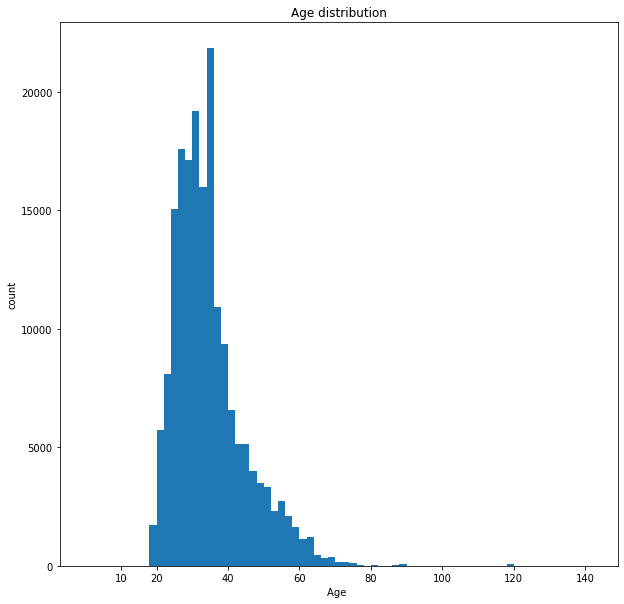

In [24]:
plt.figure(figsize=(10,10))
bins = np.arange(0, gobike['Age'].max()+2, 2)
plt.hist(data=gobike, x='Age', bins=bins)
plt.xlabel('Age ')
plt.xticks([10,20,40,60,80,100,120,140],[10,20,40,60,80,100,120,140])
plt.ylabel('count')
plt.title('Age distribution')

The Histogram is right skewed and it seemed that there are some outliers lets see the histogram on the logscale

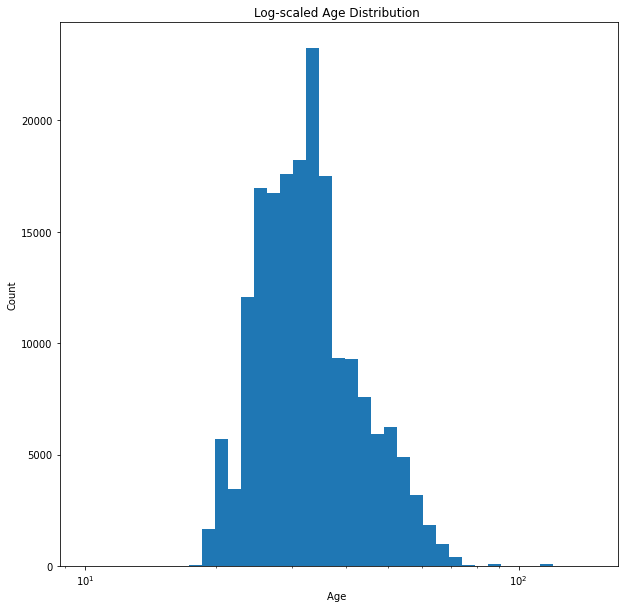

In [25]:
log_binsize = 0.03
bins = 10 ** np.arange(1, np.log10(gobike['Age'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 10])
plt.hist(data = gobike, x = 'Age', bins = bins)
plt.xscale('log')
plt.xlabel('Age ')
plt.ylabel('Count')
plt.title('Log-scaled Age Distribution ');

Now we are sure that the distribution of age has outliers for ages > 90 year

In [26]:
gobike= gobike.query('Age < 90')

Text(0.5, 1.0, 'Minute Duration distribution')

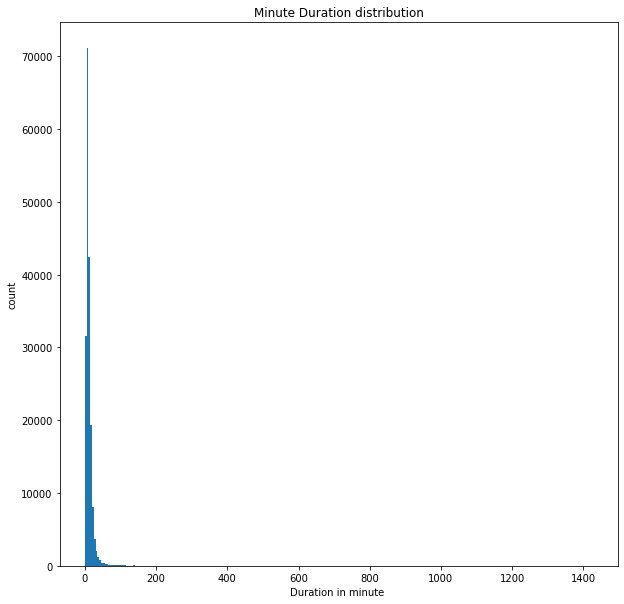

In [27]:
plt.figure(figsize=(10,10))
bins = np.arange(0, gobike['duration_minute'].max()+5, 5)
plt.hist(data=gobike, x='duration_minute', bins=bins)
plt.xlabel('Duration in minute ')
plt.ylabel('count')
plt.title('Minute Duration distribution')

The graph is right skewed and  i the graph max is more than 1400 and most of points on the graph is less than 200 so it is better to see the log scaled graph 

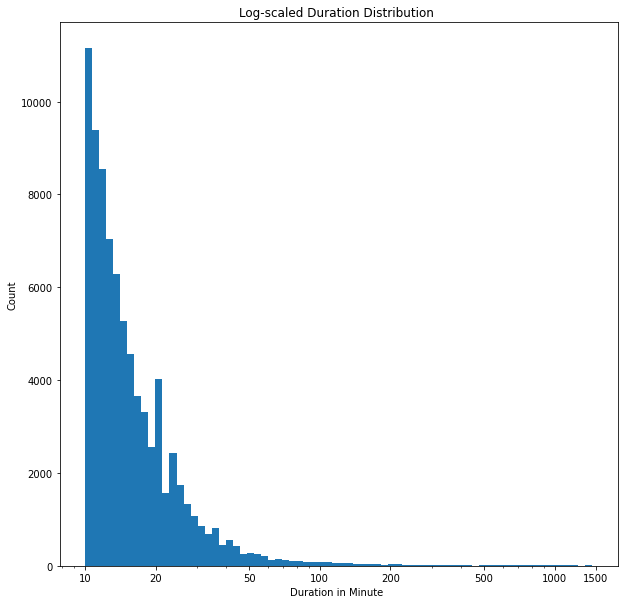

In [28]:
log_binsize = 0.03
bins = 10 ** np.arange(1, np.log10(gobike['duration_minute'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 10])
plt.hist(data = gobike, x = 'duration_minute', bins = bins)
plt.xscale('log')
plt.xlabel('Duration in Minute ')
plt.xticks([10,20,50,100,200,500,1000,1500], [10,20,50,100,200,500,1000,1500])
plt.ylabel('Count')
plt.title('Log-scaled Duration Distribution ');

there are few extreme  values that say the duration of their ride more that 200 and may reach to 1500 nearlymore than 20 hour !! it is better to remove these values as they are non confidential data

In [29]:
gobike= gobike.query('duration_minute < 200')

In [30]:
gobike.shape

(182761, 28)

### Data Wrangling and Cleaning Conclusion
Firstly we check duplicated and null values there were no duplicates but some null values appear
we check nulls and drop  nulls from start station id and name
we fill nulls by mean for member age 
and by mode for member gender
we change data type for time from object (str) to DateTime
We derive some new columns for AgeGender Time,Duration
we plot histograms and log scaled histogrm for Duration and Age to remove Outliers

#  2- Univariate Exploration

In [31]:
gobike['start_station_name'].value_counts()[:10]

Market St at 10th St                                         3897
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3539
Berry St at 4th St                                           3045
Montgomery St BART Station (Market St at 2nd St)             2885
Powell St BART Station (Market St at 4th St)                 2750
San Francisco Ferry Building (Harry Bridges Plaza)           2697
San Francisco Caltrain (Townsend St at 4th St)               2691
Powell St BART Station (Market St at 5th St)                 2312
Howard St at Beale St                                        2291
Steuart St at Market St                                      2281
Name: start_station_name, dtype: int64

In [32]:
b=gobike['start_station_name'].value_counts()[:10].to_frame()
a=b.index.tolist()

In [33]:
dfbike=gobike.loc[gobike['start_station_name'].isin(a)]


In [34]:
#hotizontal  graph ratio function
def Hratiofun(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x,y), size = 15)
    plt.show()

In [35]:
#vertical graph ratio function
def Vratiofun(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2-.2  
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x,y), size = 15)
    plt.show()

In [36]:
color = sb.color_palette()[0]

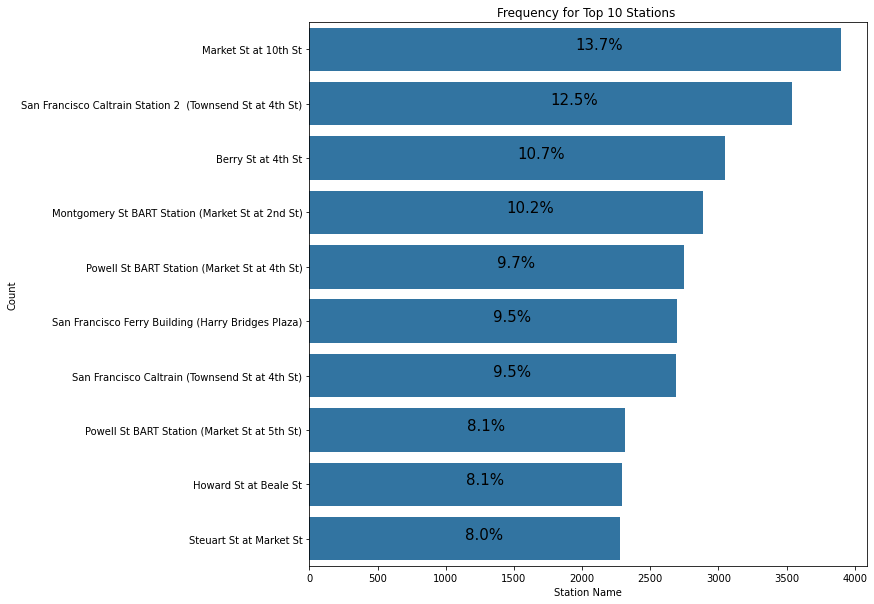

In [37]:
plt.figure(figsize=(10,10))
ax=sb.countplot(data=dfbike,y='start_station_name',color=color,order=a)
plt.xlabel("Station Name")
plt.ylabel("Count")
plt.title("Frequency for Top 10 Stations ")
Hratiofun(ax,dfbike.start_station_name)

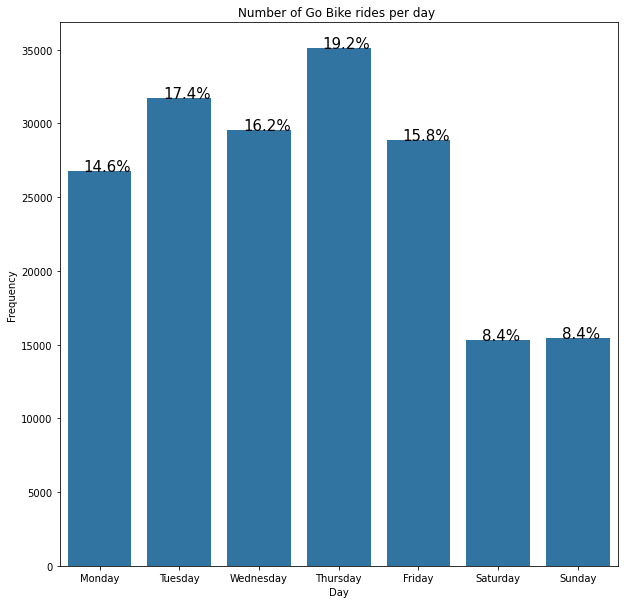

In [38]:
dayorder = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10,10))
ax=sb.countplot(data=gobike,x='dayofweek',color=color,order=dayorder)
plt.xlabel("Day")
plt.ylabel("Frequency")
plt.title("Number of Go Bike rides per day ")
Vratiofun(ax,gobike.dayofweek)

For the first look we can say, Users tend to use go bike mostly in Thursday ,Tuesday and Friday

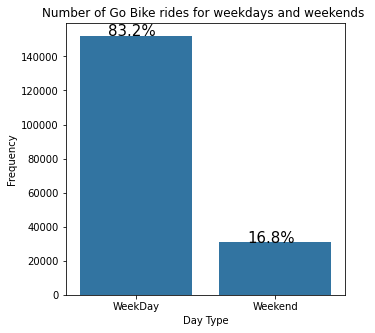

In [39]:
plt.figure(figsize=(5,5))
ax=sb.countplot(data=gobike,x='Day_Type',color=color)
plt.xlabel("Day Type")
plt.ylabel("Frequency")
plt.title("Number of Go Bike rides for weekdays and weekends ")
Vratiofun(ax,gobike['Day_Type'])

It is obvious that users tend to use go bike during weekdays more that weekends

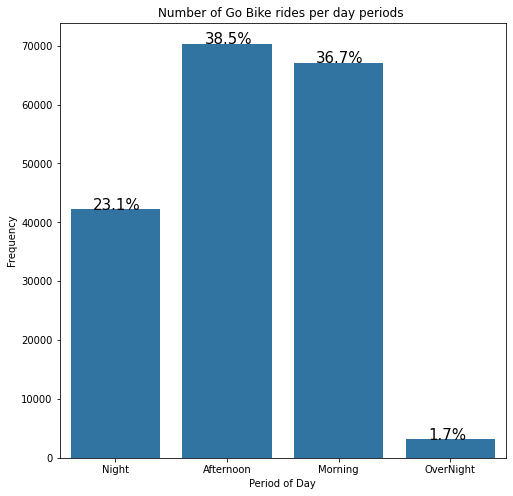

In [40]:
plt.figure(figsize=(8,8))
ax=sb.countplot(data=gobike,x='Day_segment',color=color)
plt.xlabel("Period of Day")
plt.ylabel("Frequency")
plt.title("Number of Go Bike rides per day periods ")
Vratiofun(ax,gobike['Day_segment'])

### We can say that users mostly use Go bike in the morning and afternoon more that night times
##### Morning  6 am : 11 am
##### Afternoon 12 pm :5 pm 
##### Night  6 pm : 11 pm
##### Overnight 12 am : 5 am

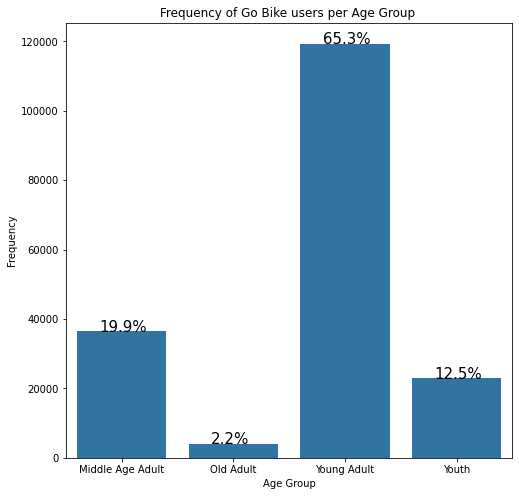

In [41]:
plt.figure(figsize=(8,8))
ax=sb.countplot(data=gobike,x='AgeGroup',color=color)
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.title("Frequency of Go Bike users per Age Group ")
Vratiofun(ax,gobike['AgeGroup'])

### We can say that users mostly use Go bike are Young Adults
##### Youth   15year : 24 year
##### Youth Adult  25year : 39 year 
##### Middle Age Adult  40 year : 59 year
##### Old Adult  more than 60 years

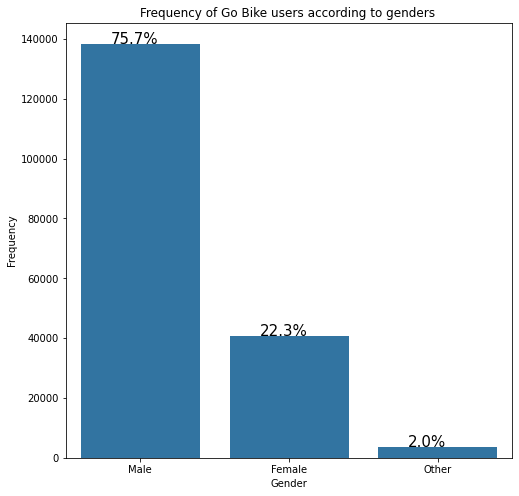

In [42]:
plt.figure(figsize=(8,8))
ax=sb.countplot(data=gobike,x='member_gender',color=color)
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Frequency of Go Bike users according to genders ")
Vratiofun(ax,gobike['member_gender'])

Most of go bike users are males

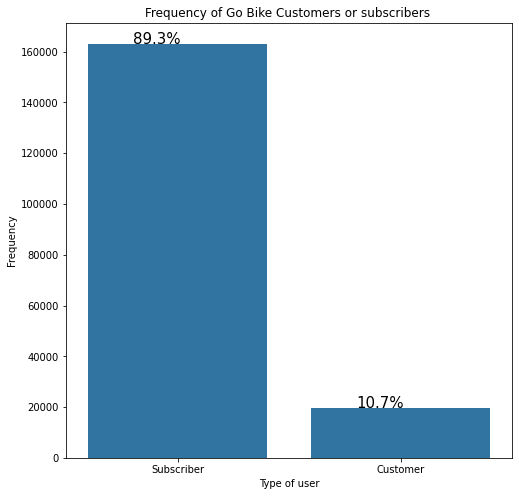

In [43]:
plt.figure(figsize=(8,8))
ax=sb.countplot(data=gobike,x='user_type',color=color)
plt.xlabel("Type of user")
plt.ylabel("Frequency")
plt.title("Frequency of Go Bike Customers or subscribers ")
Vratiofun(ax,gobike['user_type'])

Most of go bike users are subscribers 

# 3-Bivariate Exploration

Text(0.5, 1.0, 'Frequency of Go Bike users Age Group in each day period ')

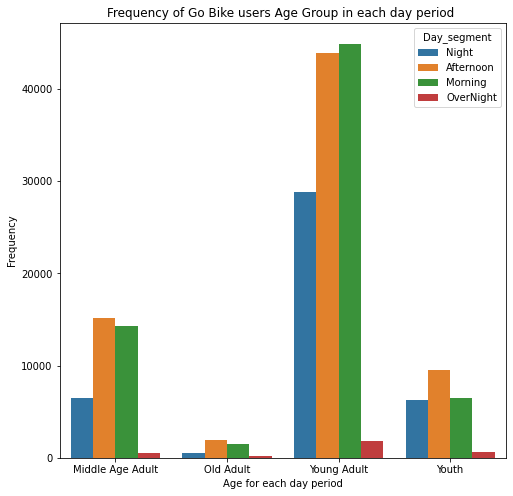

In [44]:
plt.figure(figsize=(8,8))
ax=sb.countplot(data=gobike,x='AgeGroup',hue='Day_segment')
plt.xlabel("Age for each day period")
plt.ylabel("Frequency")
plt.title("Frequency of Go Bike users Age Group in each day period ")

Text(0.5, 1.0, 'Frequency for Top 10 Stations ')

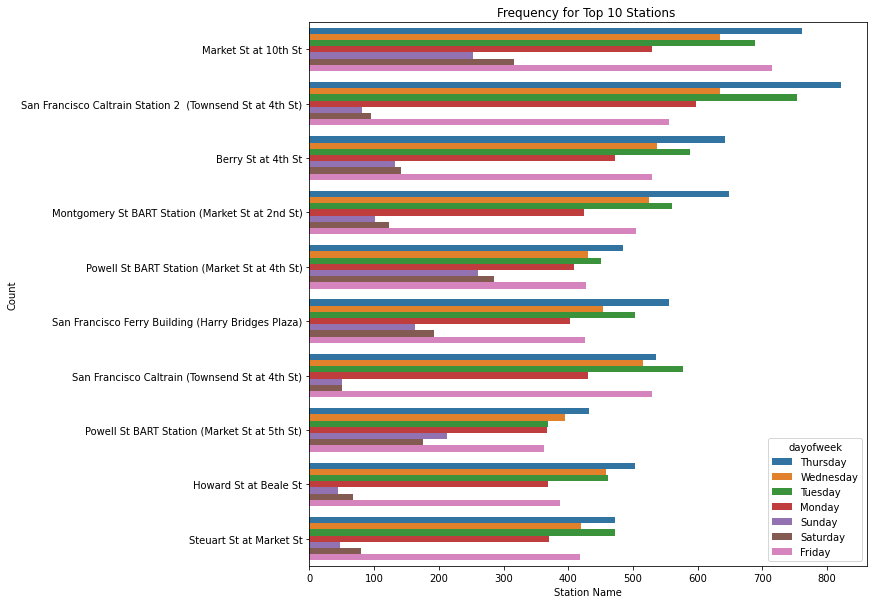

In [45]:
plt.figure(figsize=(10,10))
ax=sb.countplot(data=dfbike,y='start_station_name',hue='dayofweek',order=a)
plt.xlabel("Station Name")
plt.ylabel("Count")
plt.title("Frequency for Top 10 Stations ")


Text(0.5, 1.0, 'Frequency for Top 10 Stations ')

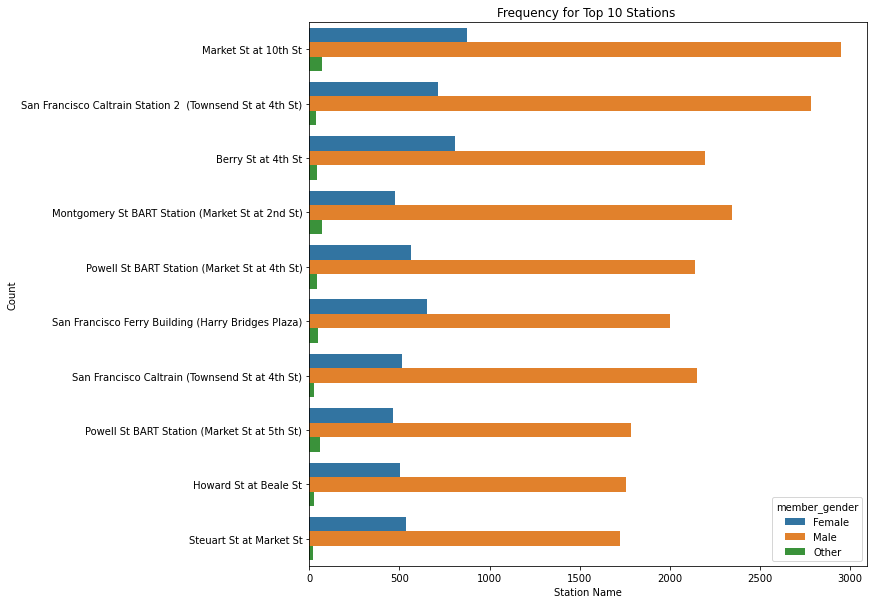

In [46]:
plt.figure(figsize=(10,10))
ax=sb.countplot(data=dfbike,y='start_station_name',hue='member_gender',order=a)
plt.xlabel("Station Name")
plt.ylabel("Count")
plt.title("Frequency for Top 10 Stations ")


Text(0.5, 1.0, 'Number of Go Bike rides per day periods ')

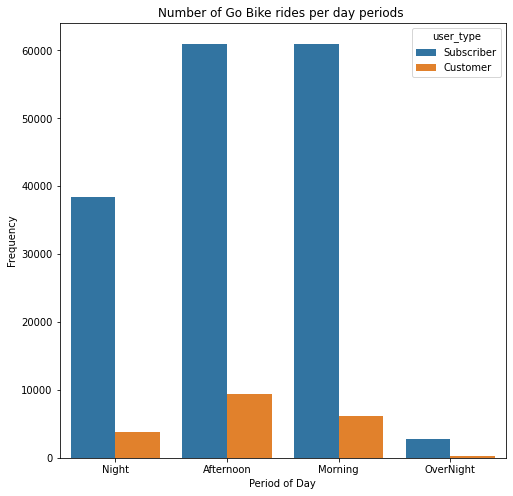

In [47]:
plt.figure(figsize=(8,8))
ax=sb.countplot(data=gobike,x='Day_segment',hue='user_type')
plt.xlabel("Period of Day")
plt.ylabel("Frequency")
plt.title("Number of Go Bike rides per day periods ")


In [48]:
#Almost there is no correlation
gobike['Age'].corr(gobike['duration_minute'])

0.020468655975583394

In [49]:
#take a sample to avoid over plotting to be able to recognize the results of scatter plot
#we took a sample using random choice with bootstraping
samples = np.random.choice(gobike.shape[0], 200, replace = True)

In [50]:
gobike_samp = gobike.iloc[samples,:]

Text(0.5, 1.0, 'Correlation between age and minute duration')

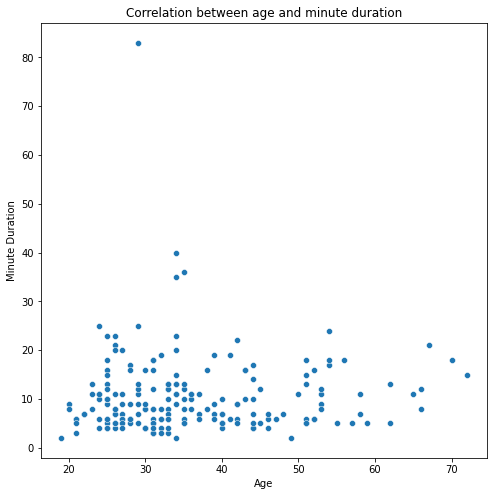

In [51]:
plt.figure(figsize=(8,8))
sb.scatterplot(data=gobike_samp ,x="Age",y='duration_minute')
plt.xlabel("Age")
plt.ylabel("Minute Duration")
plt.title("Correlation between age and minute duration")

As we see it is almost a horizontal line so it means that the correlation between duration in minute and Age is arround zero it means that there is no real correlation

In [52]:
gobike_samp['Age'].corr(gobike_samp['duration_minute'])

0.037553246307055005

the correlation of sample is negative correlation but also around the zero  it is about to be no correlation

Text(0.5, 1.0, 'Statistics about day of week and age')

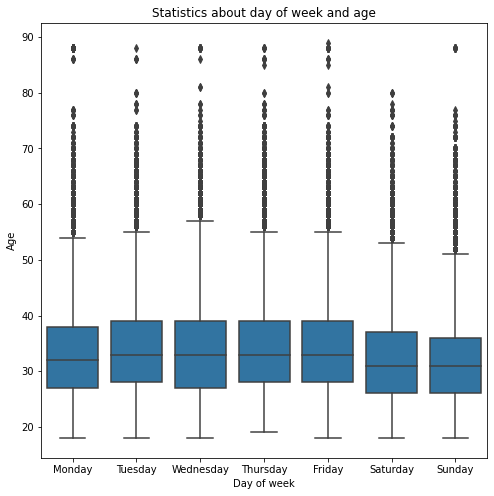

In [53]:
plt.figure(figsize=(8,8))
sb.boxplot(data=gobike, x='dayofweek', y='Age', color=color,order=dayorder);
plt.xlabel("Day of week")
plt.ylabel("Age")
plt.title("Statistics about day of week and age")

we can see that the median and quartile values for ages in all days  and slightly less values in saturday and sunday(weekends)
Median between 30 and 35 in all days

Text(0.5, 1.0, 'Statistics between gender and duration in minute')

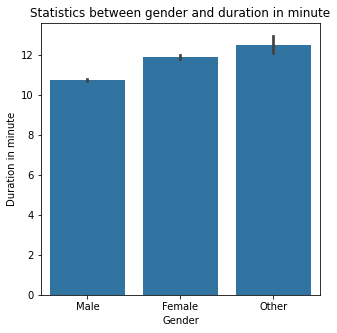

In [54]:
plt.figure(figsize=(5,5))
sb.barplot(data=gobike, x='member_gender', y='duration_minute', color=color)
plt.xlabel("Gender")
plt.ylabel("Duration in minute")
plt.title("Statistics between gender and duration in minute")


Males tend to go for shorter rides than the females

Text(0.5, 1.0, 'Statistics between Age and gender')

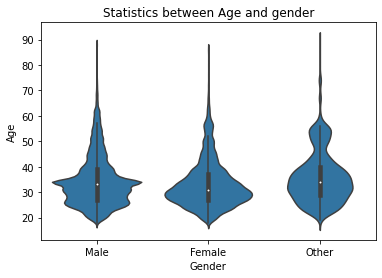

In [55]:
sb.violinplot(data=gobike, x='member_gender', y='Age', color=color);
plt.xlabel("Gender")
plt.ylabel("Age")
plt.title("Statistics between Age and gender")

By recognizing the median and the IQR we can see that the male are slightly older than the females

### Conclusion for previous Plots 
firstly we made univariate Exploration to find some info about the dataset like histogram to remove outliers and countplots to know the structure of the data
Then we made Bivariate Exploration to find statistical relations between features (categorical and numerical)  
Now, we need to go more far and make multivariate Exploration to see the whole effect of each feature belong to the other features

# 3-Multivariate Exploration

Text(0.5, 1.0, 'Time of ride per gender in weekends and weekdays')

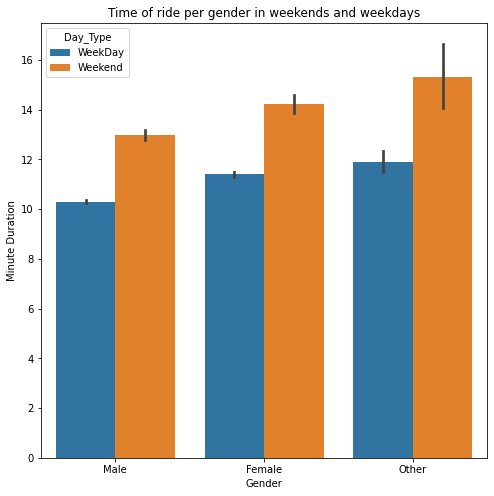

In [56]:
plt.figure(figsize=(8,8))
sb.barplot(data=gobike ,x='member_gender',y='duration_minute',hue='Day_Type')
plt.xlabel("Gender")
plt.ylabel("Minute Duration")
plt.title("Time of ride per gender in weekends and weekdays")

This graph show us a new  informations that all genders tend to have long rides in weekends and that's make sense

Text(0.5, 1.0, 'Time of ride per Agegroup in different period of day')

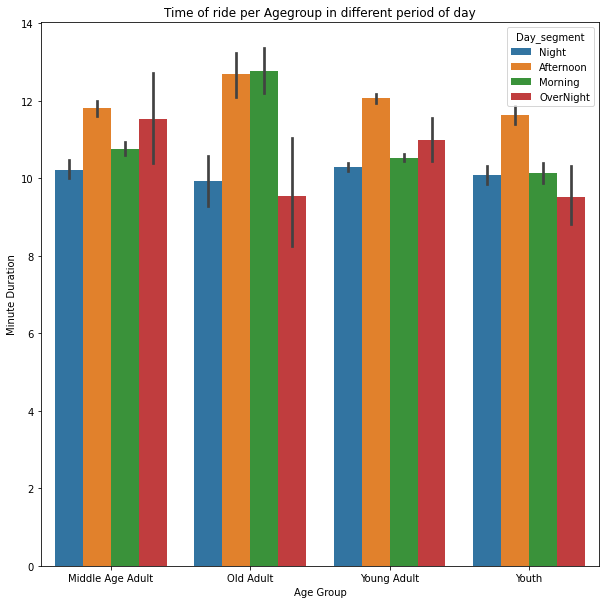

In [57]:
plt.figure(figsize=(10,10))
sb.barplot(data=gobike ,x='AgeGroup',y='duration_minute',hue='Day_segment')
plt.xlabel("Age Group")
plt.ylabel("Minute Duration")
plt.title("Time of ride per Agegroup in different period of day")

Youth ,young adults & middle age adults prefers to take long rides Afternoon
OldAdults prefer to take long rides in the morning 
most of long overnight rides are taken by middle age adults

E:\Films\Anaconda\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


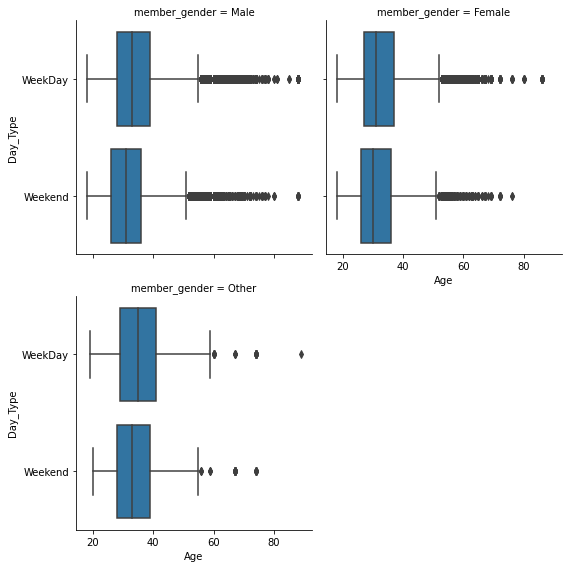

In [58]:
genderorder=['Male','Female','Other']
g = sb.FacetGrid(data = gobike, col = 'member_gender',height=4,col_wrap=2)
g.map(sb.boxplot, 'Age', 'Day_Type')


It seems that the age in all genders in weekdays rides is higher than in the weekend rides

In [59]:
customer_df = dfbike.query('user_type == "Customer"')
subscriber_df = dfbike.query('user_type == "Subscriber"')

Text(0.5, 1.0, 'number of each start station for customers')

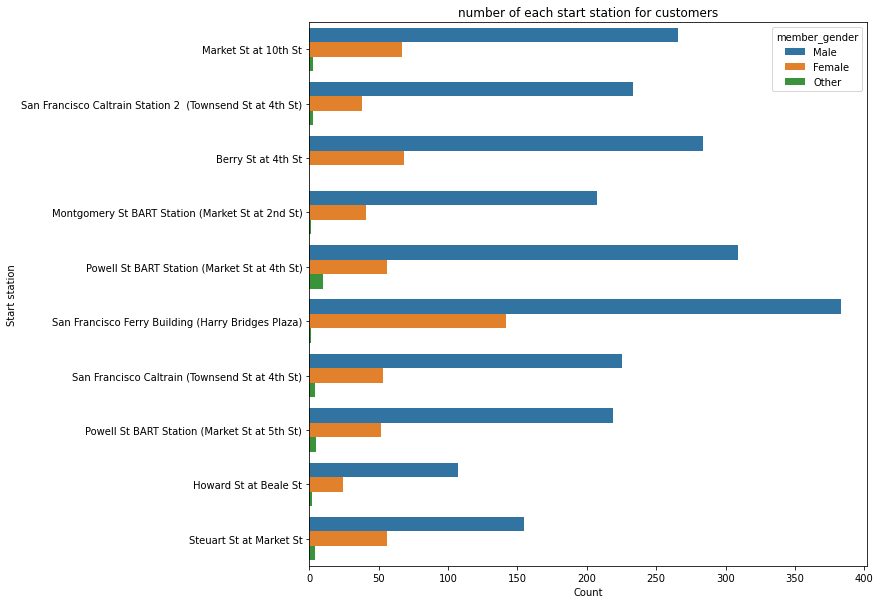

In [60]:
plt.figure(figsize=(10,10))
sb.countplot( data=customer_df , y='start_station_name', hue='member_gender',order=a)
plt.xlabel("Count")
plt.ylabel("Start station")
plt.title("number of each start station for customers")

Surprisingly, We can see that for customers (males and females) are starting mostly from san franciso ferry building (Harry Building Plaza)
but the other gender customers starts from Powell st BART Station

Text(0.5, 1.0, 'number of each start station for subscribers')

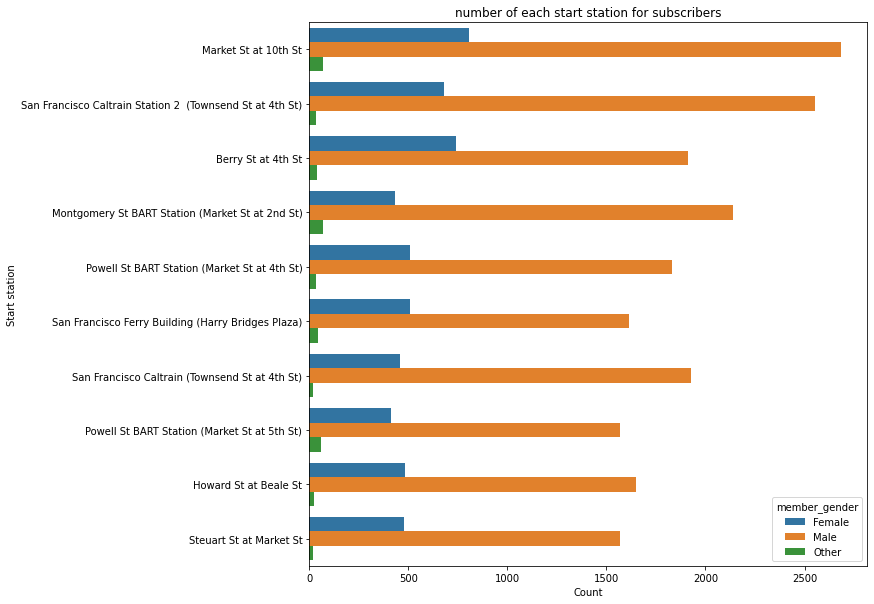

In [61]:
plt.figure(figsize=(10,10))
sb.countplot( data=subscriber_df , y='start_station_name', hue='member_gender',order=a)
plt.xlabel("Count")
plt.ylabel("Start station")
plt.title("number of each start station for subscribers")

As expected ,Subscribers starts mostly from Marker st and 10st (All genders)

E:\Films\Anaconda\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


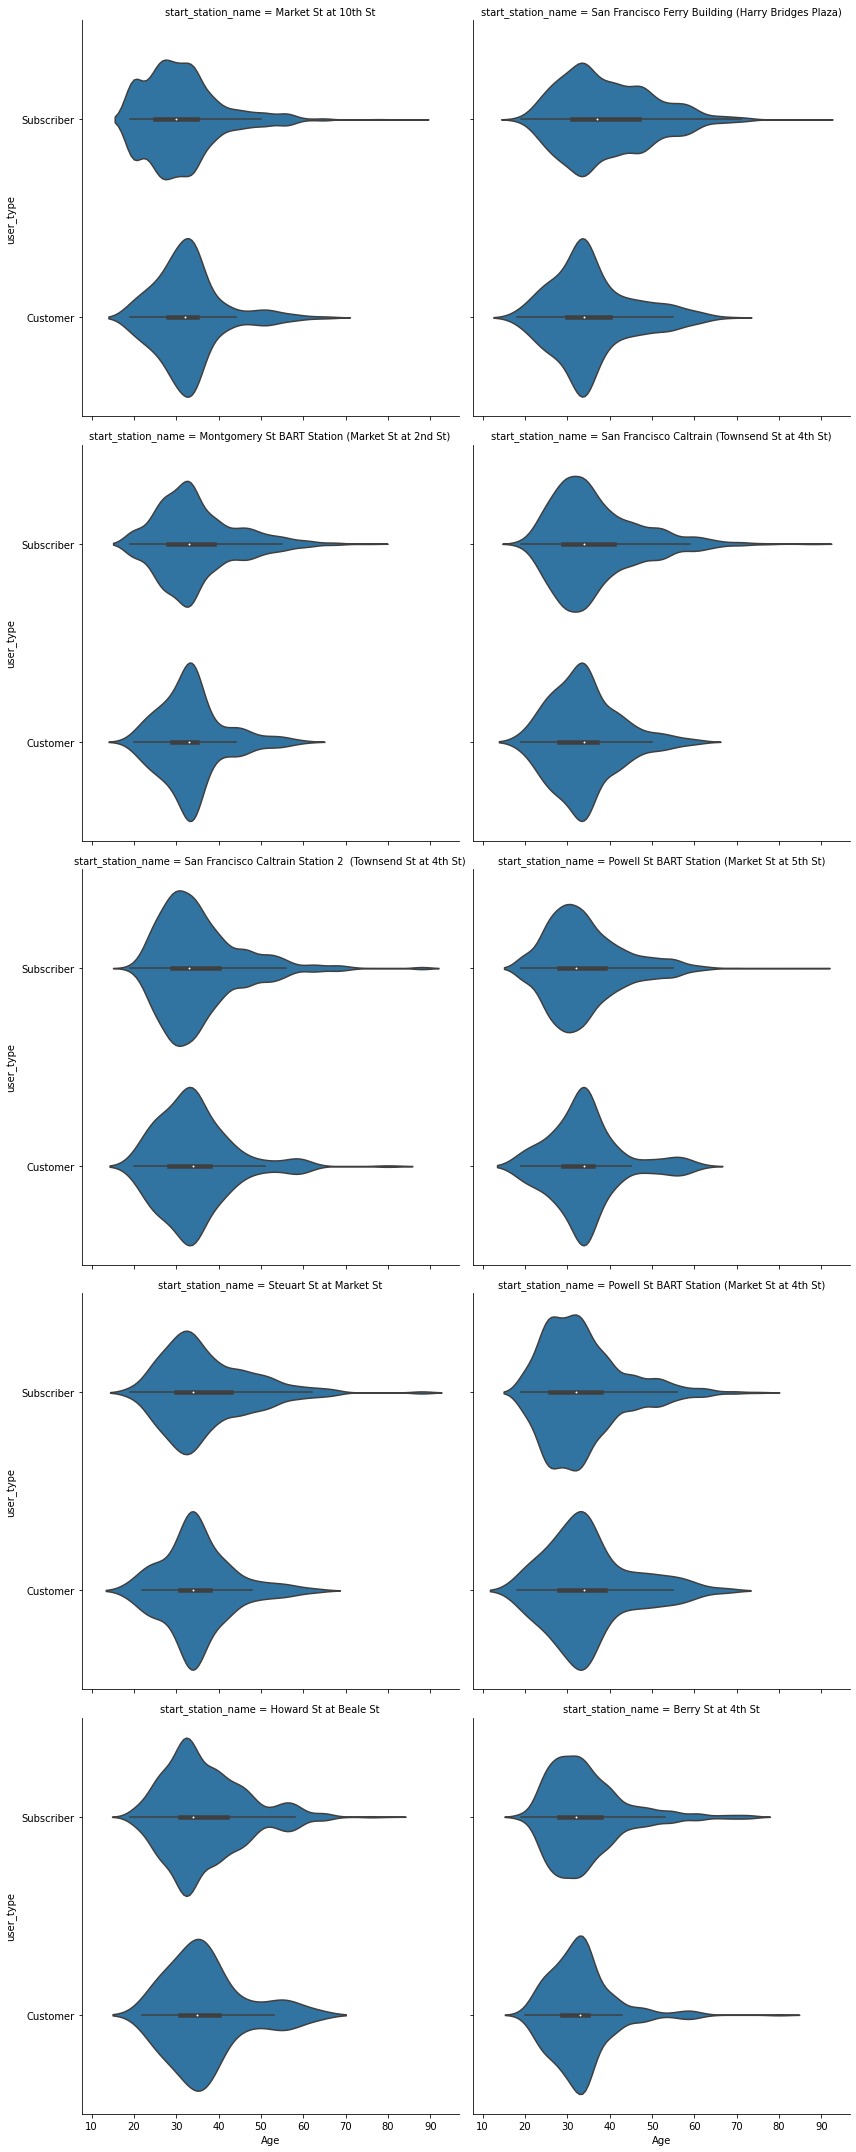

In [62]:
g = sb.FacetGrid(data = dfbike, col = 'start_station_name',height=6,col_wrap=2)
g.map(sb.violinplot, 'Age', 'user_type')

subscribers ages seems to be more confidential than customers they have higher IQR and higher median values in all start stations

### Conclusion
-We derived new features like Age Group , day of the week , daytype(Weekend/Day) , Day_segments and other features to get more clear results
-We found outliers at age >90 year and at duration more than 200 minute
-We plot the top 10 starting stations and we find that Market St at 10th St is the most starting    
 station in our data
- We make function to calculate and plot the ratio in the countplots
-We found more people tends to take their rides in weekdays
- Most of people tends to take their rides in  the morning and afternoon
-Young Adults are the most age group tends to ride from Go Ford
-Males tends to take rides more than women
-Subscriber tends to take rides from the ordinary customers
-All age groups prefer to take their rides afternoon except the old adults they prefer to take it in the morning
-we can see that the median and quartile values in all days  and slightly less values in saturday and sunday(weekends) median between 30 and 35 in all days
-Males tend to go for shorter rides than the females
-Males are slightly older than the females
-Users prefer to take their long rides in weekends
-Long overnight rides mostly taken by middle aged adults
-Surprisingly, We can see that for customers (males and females) are starting mostly from san francisco ferry building (Harry Building Plaza)
but the other gender customers starts from Powell st BART Station
-As expected ,Subscribers starts mostly from Marker st and 10st (All genders)



## Interactions between features 
- We see that all  age groups prefer to take their longer rides in afternoon except the old adults prefer to go in morning
- In overnight rides the middle age adults are the most to take longer rides
- Customers (Male,Female) Prefer starting mostly from san franciso ferry building (Harry Building Plaza) but the other gender customers starts from Powell st BART Station
- Subscribers prefer to start  mostly from Marker st and 10st (All genders)- Subscribers prefer to start 
- It seems that the age in all genders in weekdays rides is higher than in the weekend rides
- This graph show us a new  informations that all genders tend to have long rides in weekends and that's make sense